# Tackle Overfitting with Data Augmentation

In [2]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [3]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take some time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-12-17 17:35:11--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.35.254.14, 2600:1407:7400:585::317f, 2600:1407:7400:584::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.35.254.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   222MB/s    in 4.9s    

2023-12-17 17:35:16 (162 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [4]:

source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [5]:

root_dir = '/tmp/cats-v-dogs'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  train_dir = os.path.join(root_path, 'training')
  val_dir = os.path.join(root_path, 'validation')

  os.makedirs(train_dir)
  os.makedirs(val_dir)

  train_cats_dir = os.path.join(train_dir , 'cats')
  train_dogs_dir = os.path.join(train_dir , 'dogs')
  val_cats_dir = os.path.join(val_dir , 'cats')
  val_dogs_dir = os.path.join(val_dir , 'dogs')

  os.makedirs(train_cats_dir)
  os.makedirs(train_dogs_dir)
  os.makedirs(val_cats_dir)
  os.makedirs(val_dogs_dir)

try:
  create_train_val_dirs(root_path=root_dir)

except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats


In [7]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  import numpy as np

  files_list = os.listdir(SOURCE)

  total_files = len(files_list)

  total_training_files = int(np.rint(SPLIT_SIZE * total_files))

  total_testing_files = total_files - total_training_files

  training_files = random.sample(files_list, total_training_files)

  testing_files = []

  for file in files_list:

      bool_check = file in training_files

      if (bool_check == False):

        testing_files.append(file)

  list_of_substrings = SOURCE.split(sep = "/")

  file_class = list_of_substrings[(len(list_of_substrings) - 1)]

  for file in training_files:

    file_path = os.path.join(SOURCE, file)

    file_size = os.path.getsize(file_path)

    if (file_size > 0):

        new_path = os.path.join(TRAINING, file)
        
        copyfile(file_path, new_path)

    else:

      printed_msg = file + " is zero length, so ignoring."
      print(printed_msg)

  for file in testing_files:


    file_path = os.path.join(SOURCE, file)

    file_size = os.path.getsize(file_path)

    if (file_size > 0):

        new_path = os.path.join(TESTING, file)

        copyfile(file_path, new_path)

    else:

      printed_msg = file + " is zero length, so ignoring."
      
      print(printed_msg)

  pass


In [8]:

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")


if len(os.listdir(TRAINING_CATS_DIR)) > 0:
    for file in os.scandir(TRAINING_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
    for file in os.scandir(TRAINING_DOGS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
    for file in os.scandir(VALIDATION_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
    for file in os.scandir(VALIDATION_DOGS_DIR):
        os.remove(file.path)

split_size = 0.9


split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images")

print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")


666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Original cat's directory has 12500 images
Original dog's directory has 12500 images


There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [9]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale = 1/255,
                                          rotation_range = 40,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True,
                                          fill_mode = 'nearest'

                                    )

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
 
  return train_generator, validation_generator

In [10]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():

    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(512, activation='relu'),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ])

    model.compile(optimizer=RMSprop(learning_rate=0.001),
                  
                  loss='binary_crossentropy',
                  
                  metrics=['accuracy'])
    
    return model


In [12]:

model = create_model()

history = model.fit(train_generator,
                    epochs=12,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/12
 363/1125 [========>.....................] - ETA: 1:50 - loss: 0.6779 - accuracy: 0.5723

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1125/1125 [==============================] - 182s 157ms/step - loss: 0.6447 - accuracy: 0.6259 - val_loss: 0.7344 - val_accuracy: 0.5696
Epoch 2/12
1125/1125 [==============================] - 177s 158ms/step - loss: 0.5893 - accuracy: 0.6899 - val_loss: 0.5480 - val_accuracy: 0.7168
Epoch 3/12
1125/1125 [==============================] - 173s 154ms/step - loss: 0.5576 - accuracy: 0.7153 - val_loss: 0.5529 - val_accuracy: 0.7336
Epoch 4/12
1125/1125 [==============================] - 172s 153ms/step - loss: 0.5340 - accuracy: 0.7345 - val_loss: 0.5151 - val_accuracy: 0.7524
Epoch 5/12
1125/1125 [==============================] - 172s 153ms/step - loss: 0.5216 - accuracy: 0.7452 - val_loss: 0.5564 - val_accuracy: 0.7164
Epoch 6/12
1125/1125 [==============================] - 172s 153ms/step - loss: 0.5091 - accuracy: 0.7550 - val_loss: 0.5048 - val_accuracy: 0.7480
Epoch 7/12
1125/1125 [==============================] - 172s 153ms/step - loss: 0.4926 - accuracy: 0.7631 - val_loss: 0.493

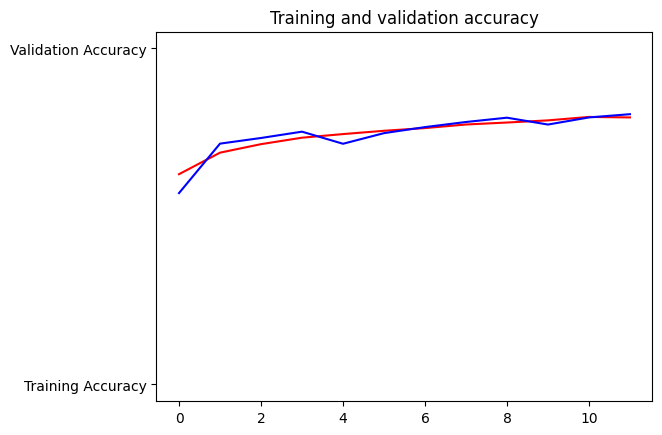

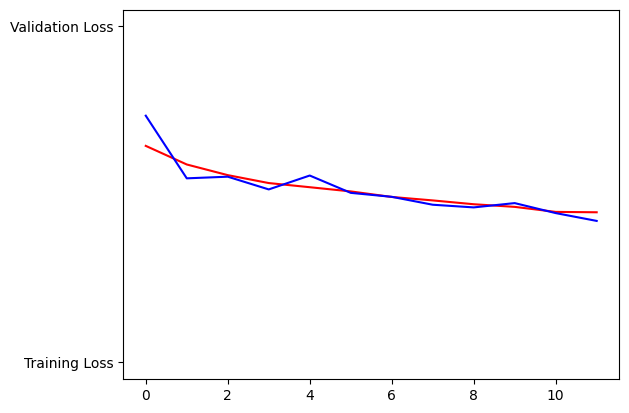

In [13]:

# sets for each training epoch

acc=history.history['accuracy']

val_acc=history.history['val_accuracy']

loss=history.history['loss']

val_loss=history.history['val_loss']


epochs=range(len(acc)) 

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, 'r', "Training Accuracy")

plt.plot(epochs, val_acc, 'b', "Validation Accuracy")

plt.title('Training and validation accuracy')

plt.show()

print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------

plt.plot(epochs, loss, 'r', "Training Loss")

plt.plot(epochs, val_loss, 'b', "Validation Loss")

plt.show()